### Linear Regression


QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.




In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
import pandas as pd
medical_df = pd.read_csv(medical_charges_url)
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.region.unique()  # just finding all the unique values of regions. 

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
medical_df.info()  # we have columns age, sex, bmi, chuldren, smoker, region, charges...... charges is the yi

# we have 1338 entries with 7 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# just setting some default paramters of seaborn and matplotlib. 

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# Plotting Distribution for Age.

# Maybe the age of 18 and 19 is high because that is the age people get insurance for their children mostly. 

fig = px.histogram(medical_df, # creating a histogram.... if we wanted to create a scatter plot we do px.scatter()
                   x='age',   # plot which column on x axis
                   marginal='box', # adds a box plot on top of the plot
                   nbins=47,   # num of columns in the plot 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)  #  gap between bars of adjacent location
fig.show()

In [ ]:
# Plotting Distribution for BMI.

fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'],   # adding that color isn't defauly but red for the plot. 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
# Let's look at the column we are trying to predict - Charges.
# Here we are looking at charges with respect to smokers vs non smokers.

fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker',  # what this adds is that it adds a condition to the plot, if smoker have a different color = green. You can see in the plot below.
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

# median of chargers for non smokers (grey line is $7000) vs median of chargers for smokers is $35,000 signiricant increase 

In [ ]:
# Visualizing Charges with resect to Region

fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region',  # what this adds is that it adds a condition to the plot. Charges with respect to region basically
                   color_discrete_sequence=['green', 'grey', 'red', 'blue'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

# Across region, not much changes and the charges is sort of the similar range in terms of mean

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?

TIP:  When you're doing data analysis, you should always try to measure up to authenticated sources. Now what you have from your data about smokers, you can go to a govt website and find what you have in your dataset and match it with national averages. Is it the same stuff ballpark? or are there any discrpancies or anomalies or weird outliers in our datasets?

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

Age and Charges should be the most critical in figuring how health insurance costs ....

**Scatterplot** - to display values for typically two variables for a set of data. Scatter plots are used to observe relationships between variables

In [ ]:
# Creating a scatterplot to observe relationship between age and charges
fig = px.scatter(medical_df, 
                 x='age', # age on x axis
                 y='charges', # charges on the y axis
                 color='smoker', # differentiate color based on smoker vs non smoker on top of the scatterplot
                 opacity=0.8, 
                 hover_data=['sex'], # when you hover on point, what properties should be shown. You already have age, charges and smoker... so to that you also want to see sex
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Overall we see smoking (blue color) absolutely increase the probabibility ofyour chances of incuring a higher insurance costs.....

We can make the following observations from the above chart:

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

We can see three "clusters" of points, each of which seems to form a line with an increasing slope: (0-10k non smokers ........ 10k to 20k some smokers....... 20k - 40k some smokers with additional problem like obesity, accident, health issues etc.) 

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

Similarily, lets see BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [ ]:
# Creating a scatterplot to observe relationship between age and charges
fig = px.scatter(medical_df, 
                 x='bmi', # bmi on x axis
                 y='charges', # charges on the y axis
                 color='smoker', # differentiate color based on smoker vs non smoker on top of the scatterplot
                 opacity=0.8, 
                 hover_data=['sex'], # when you hover on point, what properties should be shown. You already have age, charges and smoker... so to that you also want to see sex
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

**Violin Plot -** A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.

**Correlation Coefficient Value**
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

# We can see there is higher corelation comparatively of charges with age compared to charges with bmi

0.19834096883362895

In [ ]:
# To get for smoker, we need to encode 1 for smoker and 0 for non smoker because categorical features need to be converted into numerical features to be 
# able to be run correlation on it.

smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)  # mapping the values into a new column with yes mapping to 1 and no mapping to 0.
medical_df.charges.corr(smoker_numeric)  # shape is (1338)



0.787251430498478

In [ ]:
# To find corr of each dimension with each dimension

medical_df.corr()

# We can see the highest is 

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


**Heat Map** - A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space. 

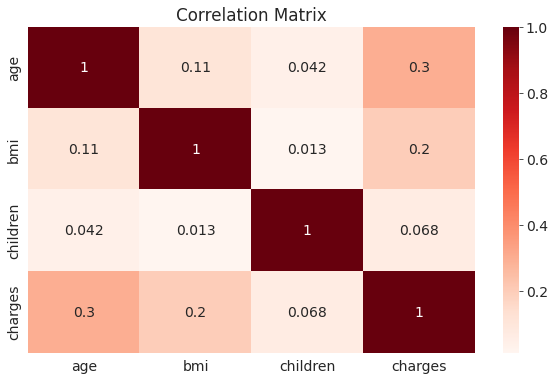

In [ ]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)  # heatmap should be based on medical_df.corr() matrix, give it a red color and have label/annots "on"
plt.title('Correlation Matrix');

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features 
X
 and 
Y
 can be correlated if 
X
 causes 
Y
 or if 
Y
 causes 
X
, or if both are caused independently by some other factor 
Z
, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that 
X
 are 
Y
 simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

### Linear Regression using a Single Feature
We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

y
=
w
x
+
b
 
The line is characterized two numbers: 
w
 (called "slope") and 
b
 (called "intercept"). .... in fact this is called the weights  w and biases b in ML.

Model
In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

c
h
a
r
g
e
s
=
w
×
a
g
e
+
b

In [ ]:
# sample fnction that takes in age, weight w and bias b and returns a basic value for the charges based on the formula charges = w*age + b
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
w = 50
b = 100

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

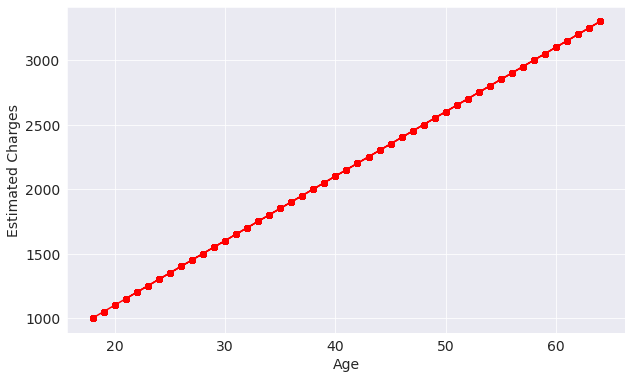

In [ ]:
# Plotting based on our w and b what should be the estimated charges

plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

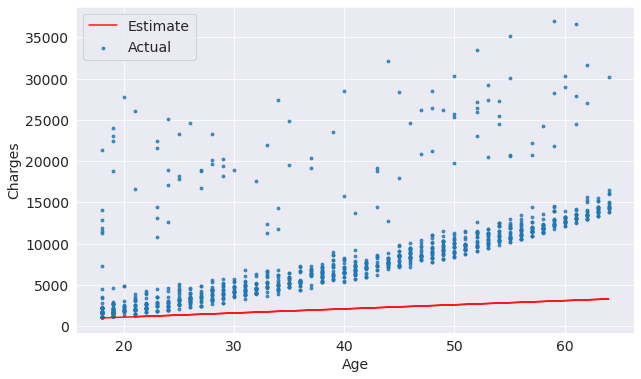

In [ ]:
# Now let's see how does our estimated charges based on just the age do with our assumptions on weights and biases compared to the actual charges 

actual_charges = non_smoker_df.charges  # actual charges 

plt.plot(ages, estimated_charges, 'r', alpha=0.9);  # plotting the first plot of estimated charges
plt.scatter(ages, actual_charges, s=8,alpha=0.8);  # plotting the second plot of actual charges. 
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

# we can see our estimation is a flop because it no where close to the trend line... maybe we need to move our weights up and down.
# Actually moving this weight for million of values is what ML/Deep learning is all about. Shook Pikachu face!!!! 

In [ ]:
# Writing a Helper Function for this 
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

In [ ]:
# Writing code for Root Mean Squared Error 

import numpy as np


In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))  # just doing all the steps in calculation of a RMSE... take differemce, square them to remove -ve signs and then take 
    # average and then take a square root..... its in the name -- ROOT MEAN SQUARED ERROR.

RMSE Loss:  8461.949562575488


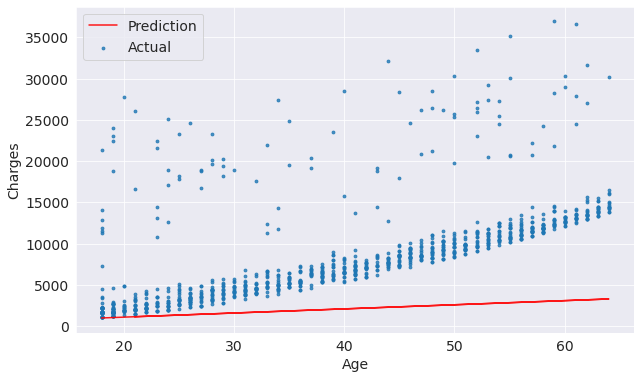

In [ ]:
# Now we have a way to measure our varying weights and biases (w,b) we give the linear regression model. So let's call with w = 50, b = 100

try_parameters(50,100)

# This means that our model is 8461 dollars off on averge from the actual values. Pretty bad we would say since most values lie between 2000 - 15000 from the below plot
# And we see that our line is below so we need to increase our weights.... Let's try with w = 200

RMSE Loss:  4779.554003723564


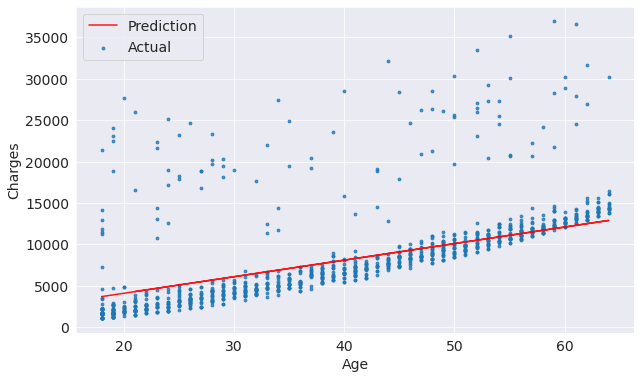

In [ ]:
try_parameters(200,100) ## MUCH MUCH BETTER .... RMSE is only 4000 off.. let's see if we can improve any further


RMSE Loss:  4732.463349255093


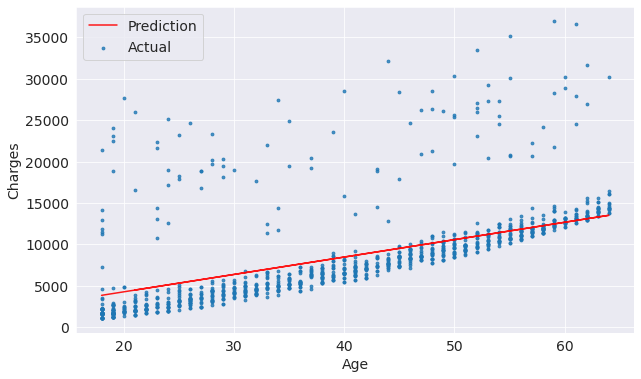

In [ ]:
try_parameters(210,75) ## So far the best.... little more improvement from the above one.


In [ ]:
# now let's look at building the Linear Regression model from SCIKIT LEARN
!pip install scikit-learn --quiet

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
help(model.fit)  # HELP TELLS WHAT THE FUNCTION DOES VERY USEFUL !!!!

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
# Not that the input X must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
# We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61
model.predict(np.array([[23], [37], [61]]))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
# X does not have valid feature names, but LinearRegression was fitted with feature names
predictions = model.predict(inputs)
predictions


array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(targets, predictions)

4662.505766636391

In [ ]:
# Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

# The parameters of the model are stored in the coef_ and intercept_ properties.

# w
model.coef_


array([267.24891283])

In [ ]:
# b
model.intercept_

-2091.4205565650864

In [ ]:
# Now let's look at SGD Regressor
from sklearn.linear_model import SGDRegressor

model2 = SGDRegressor()
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)
model2.fit(inputs, targets)
model2.predict(np.array([[23], [37], [61]]))


inputs.shape : (1064, 1)
targes.shape : (1064,)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 2400.44791391,  6227.77166896, 12788.89810619])

In [ ]:
# Now putting prediction in df 
predictions2 = model2.predict(inputs)
predictions2

array([1033.54657282, 3767.349255  , 5134.25059609, ..., 1033.54657282,
       1033.54657282, 1853.68737747])

In [ ]:
rmse(targets, predictions2)

# SGD is pretty bad lol.... very shit. 

4915.541119054136

In [ ]:
# Now let's build a Regressor model for Age of Smokers vs Charges...... The first model we made was for the Age of Non Smokers vs Charges

# model variable still holds the object for the LinearRegression()

smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df.shape



(274, 7)

In [ ]:
inputs3 = smoker_df[['age']]
targets3 = smoker_df.charges
print('inputs.shape :', inputs3.shape)
print('targets.shape :', targets3.shape)

model.fit(inputs3, targets3)
model.predict(np.array([[23], [37], [61]]))



inputs.shape : (274, 1)
targets.shape : (274,)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([27314.59297544, 31587.91940498, 38913.62185562])

In [ ]:
predictions3 = model.predict(inputs3)
predictions3

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [ ]:
rmse(targets3, predictions3)

# Well given the range of the charges have increased, a +- of 10,711 is okayish, not too bad.

10711.00334810241

Every machine learning problem has three components:
1. Model
2. Cost Function
3. Optimizer

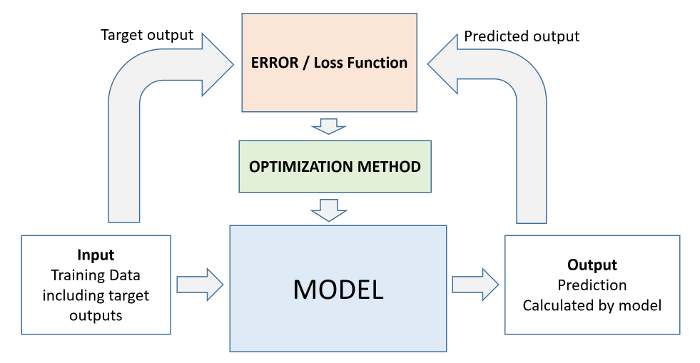



In [ ]:
# As we've seen above, it takes just a few lines of code to train a machine learning model using scikit-learn.

# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)



Loss: 4662.505766636391


### Linear Regression using Multiple Features

c
h
a
r
g
e
s
=
w
1
×
a
g
e
+
w
2
×
b
m
i
+
b

### Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

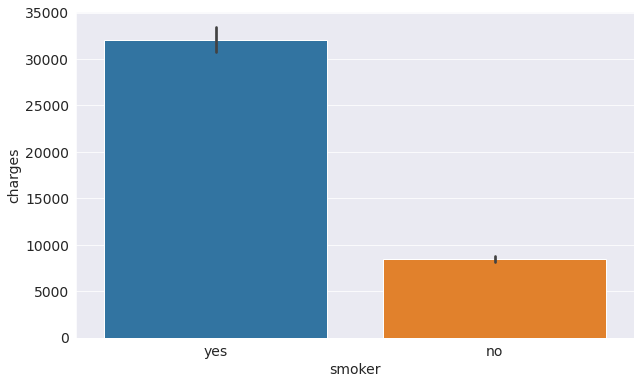

In [ ]:
# Here, in this example, the smoker column is the categorica one with only binary categories i.e smoker and non smoker so we convert that into binary 0 and 1 
sns.barplot(data=medical_df, x='smoker', y='charges');


In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)  # maps the codes to the smoker column for no it is 0, and for yes it is 1.

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0



### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

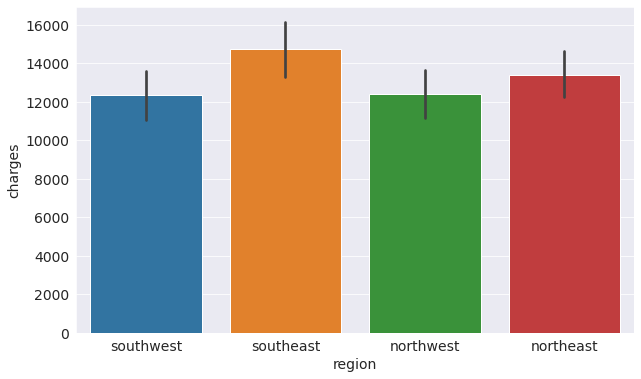

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges');

In [ ]:
# ONE HOT ENCODING 

from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_  # Categories has all the categories within the region column.

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


Question to Ponder over ?

Are two separate linear regression models, one for smokers and one of non-smokers, better than a single linear regression model? Why or why not? Try it out and see if you can justify your answer with data.

In [ ]:
# converting a categorical binary feature into a numerical feature.
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df.charges.corr(medical_df.sex_code)

# hence we can see that gender doesn't have too much role in defining charges.

0.057292062202025484

In [ ]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174453


### Model Improvements
Feature Scaling....
Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model.

1. To compare the importance of each feature in the model, our first instinct might be to compare their weights.



In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age (which is absurd because age was the biggest factor in differentiating/coorelation) and then the next important factor was smoker/non smokers, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

**Because different columns have different ranges, we run into two issues:**

1. We can't compare the weights of different column to identify which features are important.
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

**For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.**

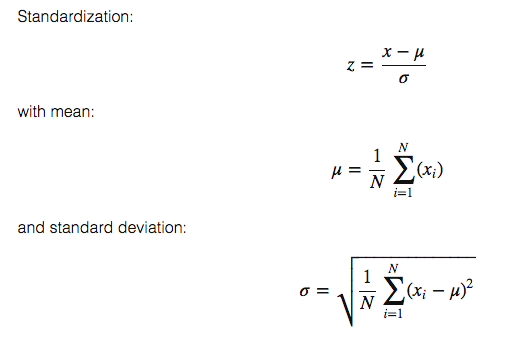

In [ ]:
# We can apply scaling using the StandardScaler class from scikit-learn.

from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']  # all the categorical columsn.
categorical_data = medical_df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)  # concntenates both the dfs nuemrical + caterical on the vertical axis (side by side) into inuts variable.
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174454


In [ ]:
# Since the numerical columns have been standardized, now we can compare the weights of the columns properly.
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

# Now we can see being a smoker and age are the 2 features that have the highest effect on Charges. 

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.

## Revision Questions
1.	Why do we have to perform EDA before fitting a model to the data?
2.	What is a parameter?
3.	What is correlation?
4.	What does negative correlation mean?
5.	How can you find correlation between variables in Python?
6.	What is causation? Explain difference between correlation and causation with an example.
7.	Define Linear Regression.
8.	What is univariate linear regression?
9.	What is multivariate linear regression?
10.	What are weights and bias?
11.	What are inputs and targets?
12.	What is loss/cost function?
13.	What is residual? 
14.	What is RMSE value? When and why do we use it?
15.	What is an Optimizer? What are different types of optimizers? Explain each with an example.
16.	What library is available in Python to perform Linear Regression?
17.	What is <code>sklearn.linear_model </code>?
18.	What does <code>model.fit()</code> do? What arguments must be given?
19.	What does <code>model.predict()</code> do? What arguments must be given?
20.	How do we calculate RMSE values?
21.	What is <code>model.coef_</code>?
22.	What is <code>model.intercept_</code>?
23.	What is SGDRegressor? How is it different from Linear Regression?
24.	Define Machine Learning. What are the main components in Machine Learning?
25.	How does loss value help in determining whether the model is good or not?
26.	What are continuous and categorical variables?
27.	How do we handle categorical variables in Machine Learning? What are the common techniques?
28.	What is feature scaling? How does it help in Machine Learning?
29.	How do we perform scaling in Python?
30.	What is <code>sklearn.preprocessing</code>?
31.	What is a Test set?
32.	How do we split data for model fitting (training and testing) in Python?
33.	How do you approach a Machine Learning problem?